<a href="https://colab.research.google.com/github/salma-abed/Deep-learning-based-automated-detection-and-classification-of-Alzheimer-s-disease-Using-Neuroimaging/blob/main/Resnet50_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import os

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.5 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn import preprocessing
from keras_preprocessing.image import load_img
from sklearn import preprocessing
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model
from multiprocessing import Pool
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from functools import partial
import pathlib
import glob

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
from tensorflow import keras
import time
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First, ***train_images*** and train_labels are initialized as empty lists.

The ***size*** variable is set to the desired size of the images after resizing.

The ***num_processes*** variable is set to the number of CPU cores to use for parallel processing.

A label_map dictionary is defined to map labels to integers.

A ***process_images*** function is defined to preprocess images for a single patient directory. First, a local images list is initialized as an empty list. 
Then, the label for the patient directory is determined by mapping the directory name to an integer using the label_map dictionary. Each image file in the patient directory is then processed by reading the image in using OpenCV, resizing it to the desired size, and appending it to the images list. Finally, a tuple containing the images list and the label integer is returned.

***glob.glob*** is used to find all patient directories in the training data directory.

The list of patient directories is passed to ***multiprocessing.Pool.map*** to apply the ***process_images*** function to each directory in parallel, using the specified number of CPU cores. The resulting list of tuples containing preprocessed images and labels for each patient directory is then unpacked into separate ***train_images*** and ***train_labels*** lists.



1.       images = [], This line defines a function named train_process_images that takes one argument case_dir, which is the directory containing the images to be processed.

2.       label = os.path.basename(os.path.dirname(case_dir)), This line extracts the label of the image from its directory name using the os.path.basename and os.path.dirname functions. The os.path.basename function returns the last component of the path (case_dir), while os.path.dirname returns the directory name of a path. The extracted label will be used later to create a label index for the image.



1.       label_idx = label_map[label], This line maps the extracted label to an index using the label_map dictionary, which contains a mapping of label names to their corresponding indexes.

2.       for img_path in glob.glob(os.path.join(case_dir, "*.jpg")):, This line loops over all JPEG images in the directory specified by case_dir using the glob.glob function. The os.path.join function is used to join the directory path with the file extension pattern *.jpg.







In [ ]:
train_images = [] #Train iamges array
train_labels = [] #Train labels array

In [ ]:
test_images = [] #Test iamges array 
test_labels = [] #Test labels array

In [ ]:
size = 224 #The resize of images
num_processes = 4  # Set the number of CPU cores to use
label_map = {"AD": 0, "MCI": 1, "LMCI": 2, "CN": 3}  # Map labels to integers

In [ ]:
def train_process_images(case_dir):
    images = []
    label = os.path.basename(os.path.dirname(case_dir))
    label_idx = label_map[label]
    for img_path in glob.glob(os.path.join(case_dir, "*.jpg")):
        print("Processing image:", img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (size, size))
        images.append(img)
    return images, label_idx



*   pool = Pool(processes=num_processes), This line creates a Pool object with the number of processes specified by num_processes. The Pool object 



is used to parallelize the processing of the images, which can speed up the process significantly.

*   results = pool.map(train_process_images, glob.glob("/content/drive/MyDrive/output_images_preprocessed/train/*/*")), This line uses the map method of the Pool object to apply the train_process_images function to each image in the training directory. The glob.glob function is used to find all JPEG images in the training directory. The map method returns a list of tuples, where each tuple contains the processed images and their corresponding label index.



*   pool.close(), pool.join(),These two lines close the Pool object and wait for all the processes to finish before proceeding.

*   for images, label_idx in results:, train_images.extend(images, train_labels.extend([label_idx] * len(images)), This loop iterates over the list of tuples returned by the map method and extracts the processed images and their corresponding label indexes. The loop then extends the train_images and train_labels lists with the extracted images and their label indexes, respectively.





*   train_images = np.array(train_images)
train_labels = np.array(train_labels),  These two lines convert the train_images and train_labels lists to numpy arrays using the np.array function. Numpy arrays are a commonly used data structure for deep learning models, and converting the lists to arrays allows for efficient processing of the data.









In [ ]:
pool = Pool(processes=num_processes)
results = pool.map(train_process_images, glob.glob("/content/drive/MyDrive/output_images_preprocessed/train/*/*"))
pool.close()
pool.join()

for images, label_idx in results:
    train_images.extend(images)

    train_labels.extend([label_idx] * len(images))

train_images = np.array(train_images)
train_labels = np.array(train_labels)

Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_1280_MR_Field_Mapping__br_raw_20110505114926116_23_S108089_I233423_brain_folder_0/slice_52.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_4447_MR_Field_Mapping__br_raw_20150205120146479_149_S247814_I472275_brain_folder_0/slice_56.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_4262_MR_Field_Mapping__br_raw_20121112110201536_169_S174192_I346109_brain_folder_0/slice_47.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_006_S_4713_MR_Field_Mapping__br_raw_20120813162617198_65_S160649_I323333_brain_folder_0/slice_51.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_1280_MR_Field_Mapping__br_raw_20110505114926116_23_S108089_I233423_brain_folder_0/slice_50.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_0

In [ ]:
def test_process_images(case_dir):
    images = []
    label = os.path.basename(os.path.dirname(case_dir))
    label_idx = label_map[label]
    for img_path in glob.glob(os.path.join(case_dir, "*.jpg")):
        print("Processing image:", img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (size, size))
        images.append(img)
    return images, label_idx

In [ ]:
pool = Pool(processes=num_processes)
results = pool.map(test_process_images, glob.glob("/content/drive/MyDrive/output_images_preprocessed/test/*/*"))
pool.close()
pool.join()

for images, label_idx in results:
    test_images.extend(images)
    test_labels.extend([label_idx] * len(images))

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_002_S_4262_MR_Field_Mapping__br_raw_20120420102148554_37_S147985_I299156_brain_folder_0/slice_52.jpg
Processing image:Processing image:  /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_002_S_4262_MR_Field_Mapping__br_raw_20120420102148554_37_S147985_I299156_brain_folder_0/slice_53.jpg/content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_100_S_6713_MR_Axial_MB_DTI_phase_noFatSatA_br_raw_20210901155333018_1_S1058828_I1487252_brain_folder_0/slice_281.jpg

Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_006_S_4713_MR_Axial_Field_Mapping__br_raw_20210823122658978_109_S1055912_I1483602_brain_folder_0/slice_56.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_153_S_6665_MR_Axial_DTI_FA_br_raw_20190114121528720_1_S784900_I1116077_brain_folder_0/slice_35.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed

In [ ]:
class Train_Test_Image_Counter:
    def __init__(self, train_dir, test_dir, label_map):
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.label_map = label_map

    def count_images(self):
        print("Counting images in train directory...")
        self._count_images_helper(self.train_dir)
        print("\nCounting images in test directory...")
        self._count_images_helper(self.test_dir)

    def _count_images_helper(self, data_dir):
        for label in os.listdir(data_dir):
            label_dir = os.path.join(data_dir, label)
            if not os.path.isdir(label_dir):
                continue

            label_idx = self.label_map[label]
            num_images = 0

            for root, dirs, files in os.walk(label_dir):
                for f in files:
                    if f.endswith(".jpg"):
                        num_images += 1

            print(f"Label {label} (index {label_idx}) has {num_images} JPG images.")


In [ ]:
counter = Train_Test_Image_Counter("/content/drive/MyDrive/output_images_preprocessed/train", "/content/drive/MyDrive/output_images_preprocessed/test", label_map)
counter.count_images()

Counting images in train directory...
Label AD (index 0) has 790 JPG images.
Label CN (index 3) has 800 JPG images.
Label LMCI (index 2) has 780 JPG images.
Label MCI (index 1) has 800 JPG images.

Counting images in test directory...
Label AD (index 0) has 200 JPG images.
Label CN (index 3) has 200 JPG images.
Label LMCI (index 2) has 200 JPG images.
Label MCI (index 1) has 200 JPG images.


In [ ]:
'''
Here we reassingned the variables to new names as they are more meaningful(That is not actual splitting)
The splitting was already done
'''
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

In [ ]:
class PixelNormalizer:
    def __init__(self, x_train, x_test):
        self.x_train = x_train
        self.x_test = x_test

    def normalize_pixels(self):
        self.x_train = self.x_train / 255.0
        self.x_test = self.x_test / 255.0

In [ ]:
plt.style.use('dark_background')
class TrainHistory(keras.callbacks.Callback):
    def __init__(self):
        super(TrainHistory, self).__init__()
        self.train_time = []
        self.train_losses = []
        self.train_accs = []
        
    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        
    def on_epoch_end(self, epoch, logs=None):
        self.train_time.append(time.time() - self.start_time)
        self.train_losses.append(logs['loss'])
        self.train_accs.append(logs['accuracy'])
        
        self.plot_training_curves()
        
    def plot_training_curves(self):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_time, self.train_losses, label='train loss')
        plt.xlabel('Train time (s)')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(range(len(self.train_accs)), self.train_accs, label='train acc')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.show()

In [ ]:
# Instantiate the class
normalizer = PixelNormalizer(x_train, x_test)

# Normalize pixels
normalizer.normalize_pixels()

# Access normalized data
x_train = normalizer.x_train
x_test = normalizer.x_test

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Saved Models/ResNet50_adam_optimizer.hdf5')

In [ ]:
# model=ResNet50(weights="imagenet",include_top=False, input_shape=(size, size, 3))

In [ ]:
# #Flatten output layer of Resnet
# flattened = tf.keras.layers.Flatten()(model.output)

# #Fully connected layer 1
# fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

# #Fully connected layer, output layer
# fc2 = tf.keras.layers.Dense(4, activation='softmax', name="AddedDense2")(fc1)
# model = tf.keras.models.Model(inputs=model.input, outputs=fc2)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_history = TrainHistory()

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9549

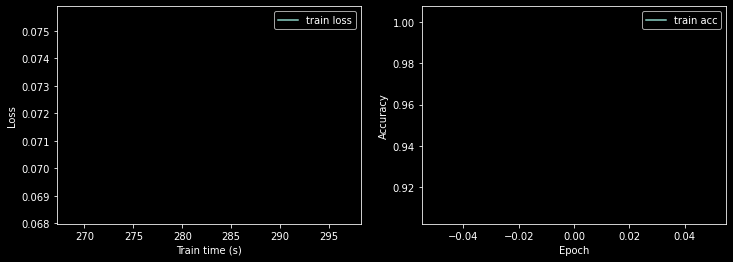

50/50 [==============================] - 283s 5s/step - loss: 0.0719 - accuracy: 0.9549
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.0705 - accuracy: 0.9580

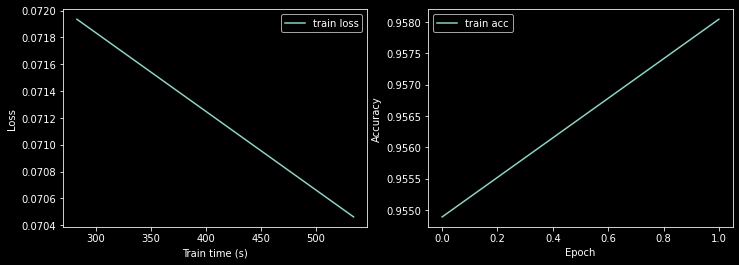

50/50 [==============================] - 252s 5s/step - loss: 0.0705 - accuracy: 0.9580
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9596

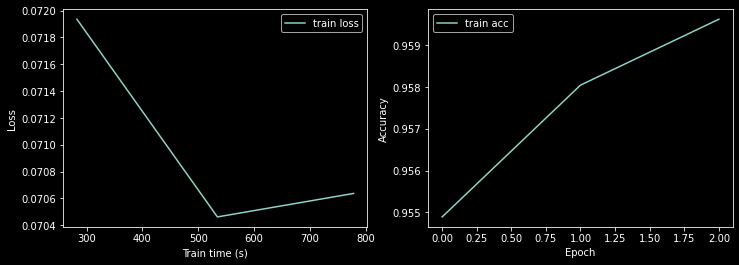

50/50 [==============================] - 244s 5s/step - loss: 0.0706 - accuracy: 0.9596
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9609

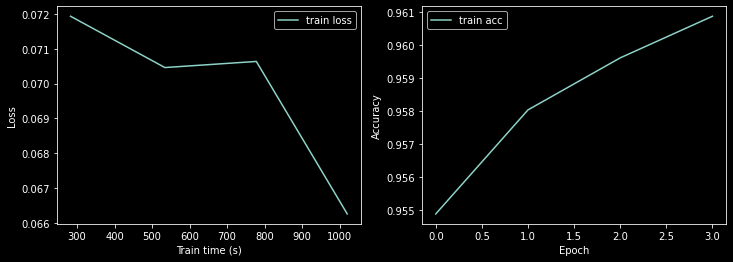

50/50 [==============================] - 242s 5s/step - loss: 0.0663 - accuracy: 0.9609
Epoch 5/10
50/50 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9628

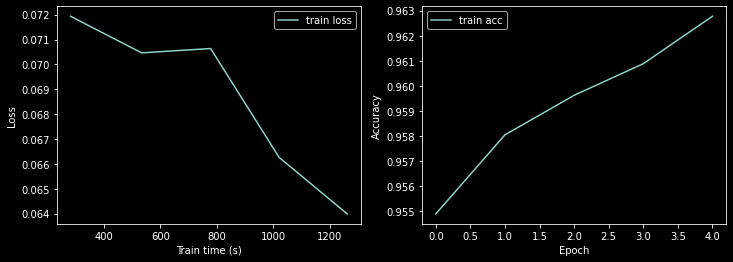

50/50 [==============================] - 241s 5s/step - loss: 0.0640 - accuracy: 0.9628
Epoch 6/10
50/50 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9606

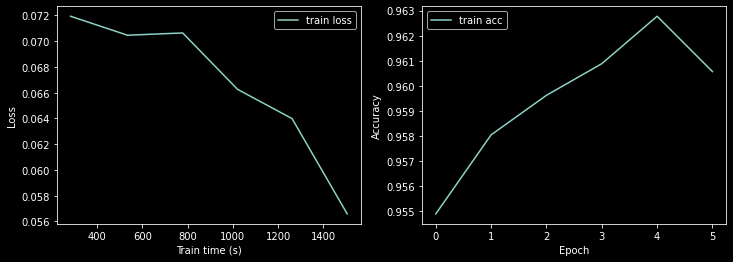

50/50 [==============================] - 244s 5s/step - loss: 0.0566 - accuracy: 0.9606
Epoch 7/10
50/50 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9615

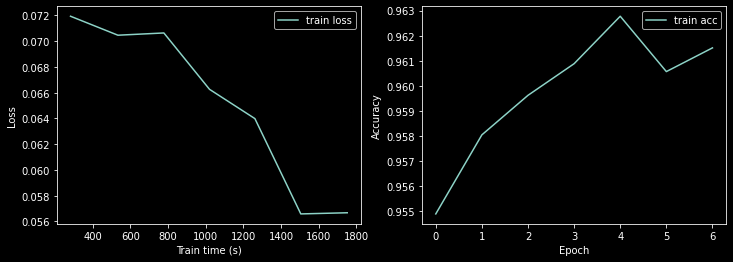

50/50 [==============================] - 246s 5s/step - loss: 0.0567 - accuracy: 0.9615
Epoch 8/10
50/50 [==============================] - ETA: 0s - loss: 0.0519 - accuracy: 0.9647

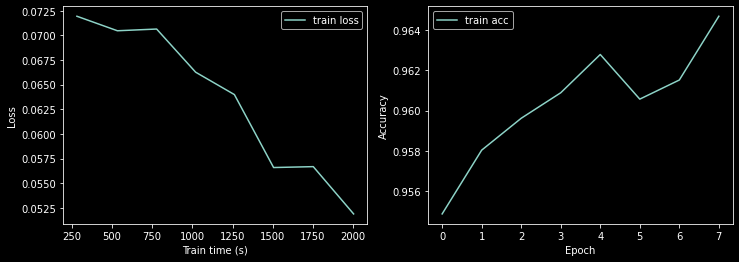

50/50 [==============================] - 251s 5s/step - loss: 0.0519 - accuracy: 0.9647
Epoch 9/10
50/50 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9644

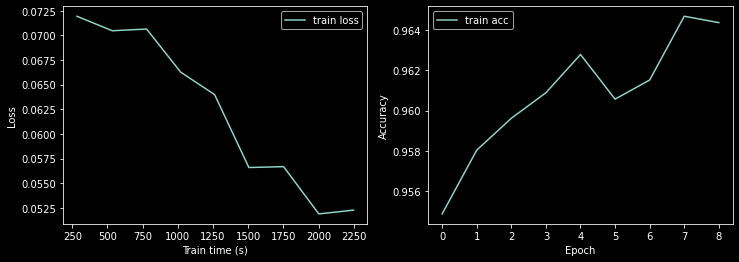

50/50 [==============================] - 247s 5s/step - loss: 0.0523 - accuracy: 0.9644
Epoch 10/10
50/50 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9644

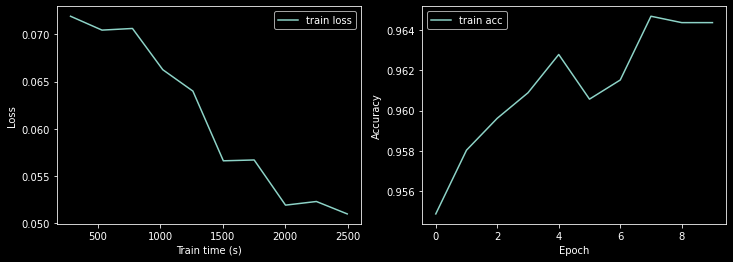

50/50 [==============================] - 247s 5s/step - loss: 0.0509 - accuracy: 0.9644


In [ ]:
# Train the model with the combined data
adam_train = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    callbacks=[train_history]
)

In [ ]:
# print("Number of images in x_train:", x_train.shape[0])

In [ ]:
model.save('/content/drive/MyDrive/Saved Models/ResNet50_adam_optimizer.hdf5')

In [ ]:
Test_loss, Test_accuracy = model.evaluate(x_test,  y_test)

25/25 [==============================] - 15s 537ms/step - loss: 1.9626 - accuracy: 0.7987


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

25/25 [==============================] - 14s 506ms/step


In [ ]:
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.799


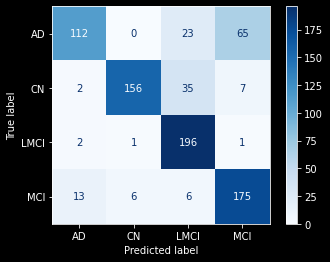

<Figure size 432x288 with 0 Axes>

In [ ]:
labels = ["AD", "CN", "LMCI","MCI"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.figure()
plt.show()

In [ ]:
# model_2=ResNet50(weights="imagenet",include_top=False, input_shape=(size, size, 3))

In [ ]:
# #Flatten output layer of Resnet
# flattened = tf.keras.layers.Flatten()(model_2.output)

# #Fully connected layer 1
# fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

# #Fully connected layer, output layer
# fc2 = tf.keras.layers.Dense(4, activation='softmax', name="AddedDense2")(fc1)
# model_2 = tf.keras.models.Model(inputs=model_2.input, outputs=fc2)

In [ ]:
model_2 = tf.keras.models.load_model('/content/drive/MyDrive/Saved Models/ResNet50_sgd_optimizer.hdf5')

In [ ]:
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Define a function that returns the desired learning rate for each epoch
def lr_schedule(epoch):
    learning_rate = 0.1
    if epoch > 4:
        learning_rate = 0.01
    elif epoch > 0:
        learning_rate = 0.1
    return learning_rate

# Create a LearningRateScheduler callback that calls the lr_schedule function
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [ ]:
model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This line creates a learning rate scheduler callback for the Keras model. A learning rate scheduler is a function that adjusts the learning rate during training to help the model converge faster and more accurately.

The lambda function lambda epoch: 1e-3 * 0.9 ** epoch is used to specify the learning rate schedule. It takes the current epoch number as input and returns the corresponding learning rate for that epoch. In this case, the learning rate starts at 0.001 and is multiplied by 0.9 after each epoch. This means that the learning rate is decreased by 10% after each epoch, which is a common strategy for learning rate scheduling in deep learning.

In [ ]:
# Create the callbacks
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch)
train_history = TrainHistory()

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.5916 - accuracy: 0.7325

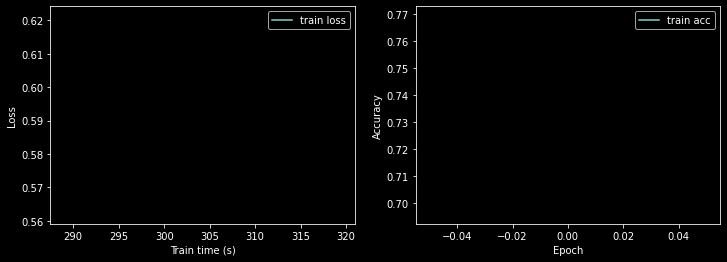

100/100 [==============================] - 305s 3s/step - loss: 0.5916 - accuracy: 0.7325 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.7293

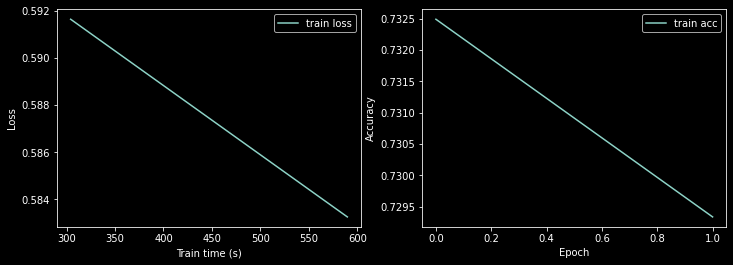

100/100 [==============================] - 285s 3s/step - loss: 0.5833 - accuracy: 0.7293 - lr: 9.0000e-04
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.5968 - accuracy: 0.7300

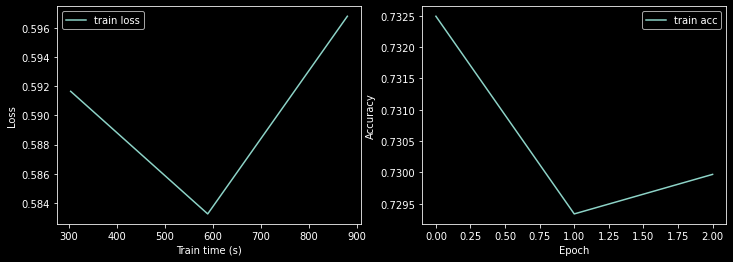

100/100 [==============================] - 291s 3s/step - loss: 0.5968 - accuracy: 0.7300 - lr: 8.1000e-04
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.5787 - accuracy: 0.7293

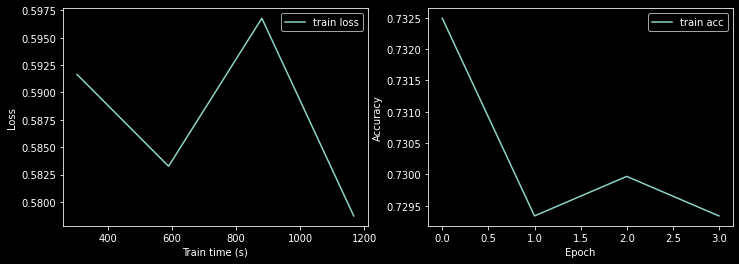

100/100 [==============================] - 287s 3s/step - loss: 0.5787 - accuracy: 0.7293 - lr: 7.2900e-04
Epoch 5/10
100/100 [==============================] - ETA: 0s - loss: 0.5686 - accuracy: 0.7423

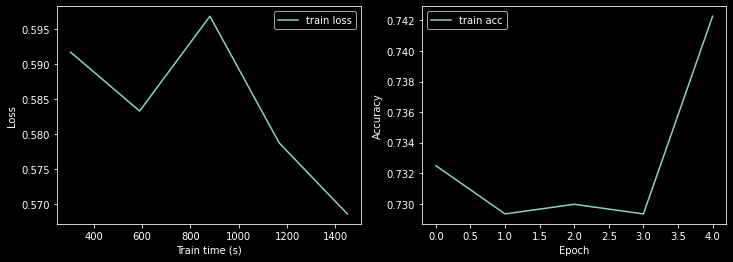

100/100 [==============================] - 282s 3s/step - loss: 0.5686 - accuracy: 0.7423 - lr: 6.5610e-04
Epoch 6/10
100/100 [==============================] - ETA: 0s - loss: 0.5879 - accuracy: 0.7309

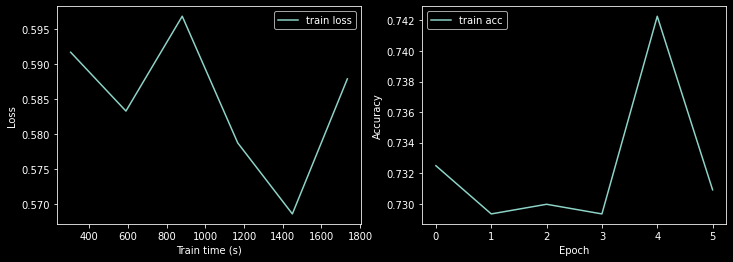

100/100 [==============================] - 284s 3s/step - loss: 0.5879 - accuracy: 0.7309 - lr: 5.9049e-04
Epoch 7/10
100/100 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.7407

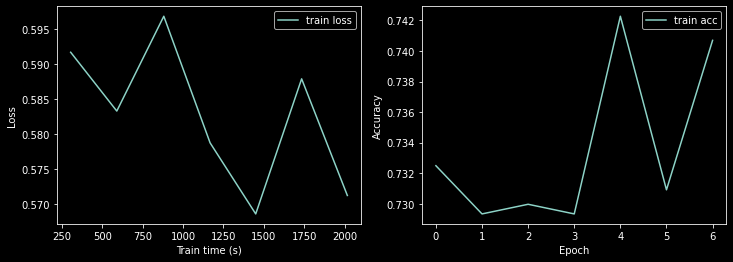

100/100 [==============================] - 283s 3s/step - loss: 0.5712 - accuracy: 0.7407 - lr: 5.3144e-04
Epoch 8/10
100/100 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.7464

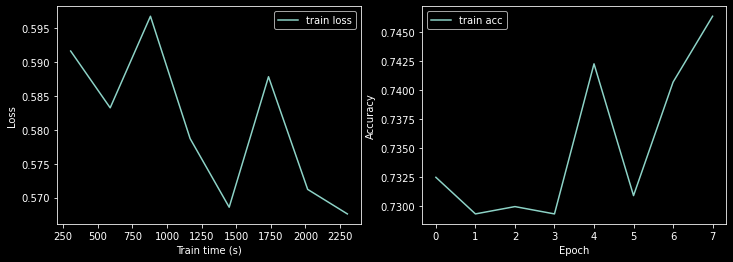

100/100 [==============================] - 287s 3s/step - loss: 0.5676 - accuracy: 0.7464 - lr: 4.7830e-04
Epoch 9/10
100/100 [==============================] - ETA: 0s - loss: 0.5639 - accuracy: 0.7448

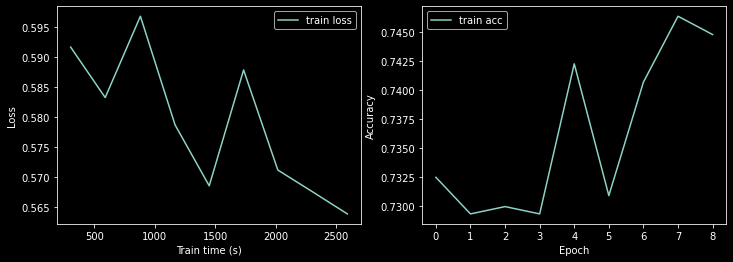

100/100 [==============================] - 288s 3s/step - loss: 0.5639 - accuracy: 0.7448 - lr: 4.3047e-04
Epoch 10/10
100/100 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.7489

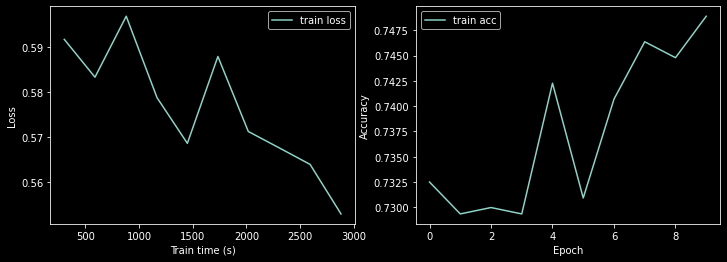

100/100 [==============================] - 288s 3s/step - loss: 0.5529 - accuracy: 0.7489 - lr: 3.8742e-04


In [ ]:
# Train the model with the combined data
sgd_train = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    callbacks=[lr_scheduler, train_history]
)

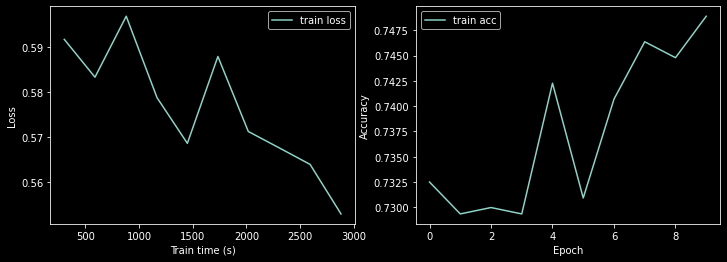

In [ ]:
train_history.plot_training_curves()

In [ ]:
Test_loss, Test_accuracy = model_2.evaluate(x_test,  y_test)

25/25 [==============================] - 16s 609ms/step - loss: 1.3619 - accuracy: 0.5962


In [ ]:
y_pred = np.argmax(model_2.predict(x_test), axis=-1)

25/25 [==============================] - 16s 607ms/step


In [ ]:
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.596


In [ ]:
model_2.save('/content/drive/MyDrive/Saved Models/ResNet50_sgd_optimizer.hdf5')

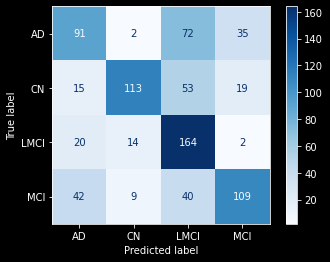

<Figure size 432x288 with 0 Axes>

In [ ]:
labels = ["AD", "CN", "LMCI","MCI"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.figure()
plt.show()